### Block views on images/arrays
[link to example](https://scikit-image.org/docs/stable/auto_examples/numpy_operations/plot_view_as_blocks.html#sphx-glr-auto-examples-numpy-operations-plot-view-as-blocks-py)

This example ilustrates the use of `skimage.util.view_as_blocks()`. Block views can be incredibly useful
when one wants to perform local operations on non-overlapping image patches.

We use `skimage.data.astronaut()` and virtaully 'slice' it into square blocks. Then on each block, we either pool the mean, the max, or the median value of that block. The results are displayed altogether, along with a spline interpolation of order 3 rescaling of the original *astronaut* image.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import skimage

image shape: (512, 512), block view shape: (128, 128, 4, 4)
flattened view shape (128, 128, 16)
mean pool shape: (128, 128), mean pool shape: (128, 128), median view shape: (128, 128)


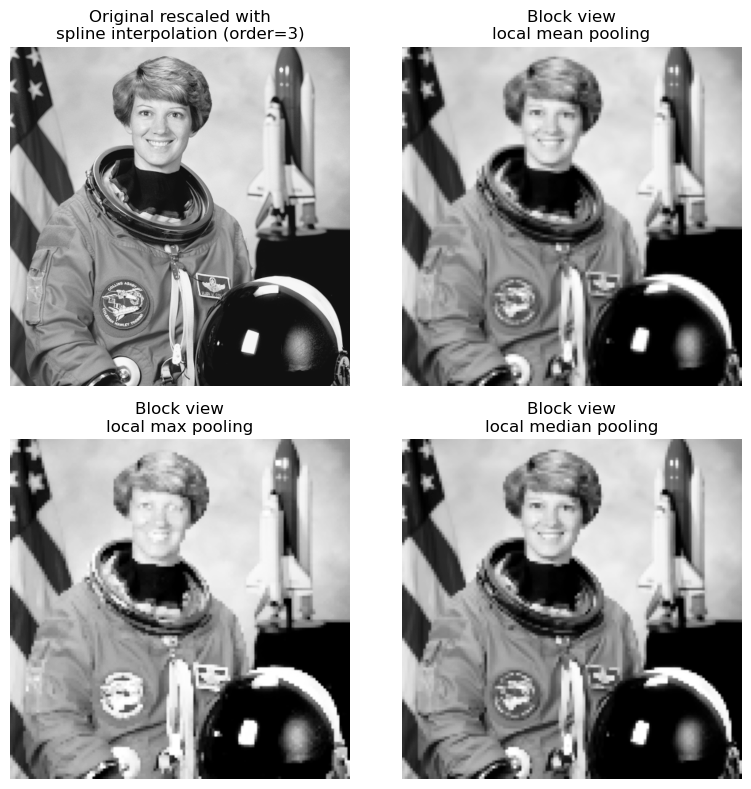

In [6]:
img = skimage.color.rgb2gray(skimage.data.astronaut())
block_shape = (4,4)

# see astronaut as a matrix of blocks
view = skimage.util.view_as_blocks(img, block_shape)
print(f"image shape: {img.shape}, block view shape: {view.shape}")

# collapse the last two dimensions in one
flatten_view = view.reshape(view.shape[0], view.shape[1], -1)
print(f"flattened view shape {flatten_view.shape}")

# resampling the image with different methods using values of each block.
mean_view = np.mean(flatten_view, axis=2)
max_view = np.max(flatten_view, axis=2)
median_view = np.median(flatten_view, axis=2)
print(f"mean pool shape: {mean_view.shape}, mean pool shape: {max_view.shape}, median view shape: {median_view.shape}")

fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.ravel()

img_resized = ndimage.zoom(img, 2, order=3)
ax[0].set_title("Original rescaled with\nspline interpolation (order=3)")
ax[0].imshow(img_resized, extent=(-0.5, 128.5, 128.5, -0.5), cmap=plt.cm.Greys_r)

ax[1].set_title("Block view\nlocal mean pooling")
ax[1].imshow(mean_view, cmap=plt.cm.Greys_r)

ax[2].set_title("Block view\nlocal max pooling")
ax[2].imshow(max_view, cmap=plt.cm.Greys_r)

ax[3].set_title("Block view\nlocal median pooling")
ax[3].imshow(median_view, cmap=plt.cm.Greys_r)

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()